In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
dataset = pd.read_csv('Links/IRIS.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
dataset.shape

(150, 5)

In [10]:
dataset['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [11]:
dataset.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

# Handling the missing values

In [9]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
dataset.duplicated().sum()

3

In [13]:
dataset.drop_duplicates(inplace = True)

In [14]:
missing_values = dataset.isnull().sum()
percentage_missing = (missing_values/len(dataset))*100
pd.DataFrame({'missing_values': missing_values,'percentage_missing': percentage_missing})

,missing_values,percentage_missing
sepal_length,0,0.0
sepal_width,0,0.0
petal_length,0,0.0
petal_width,0,0.0
species,0,0.0


In [15]:
dataset.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Visualization

<AxesSubplot:xlabel='species', ylabel='count'>

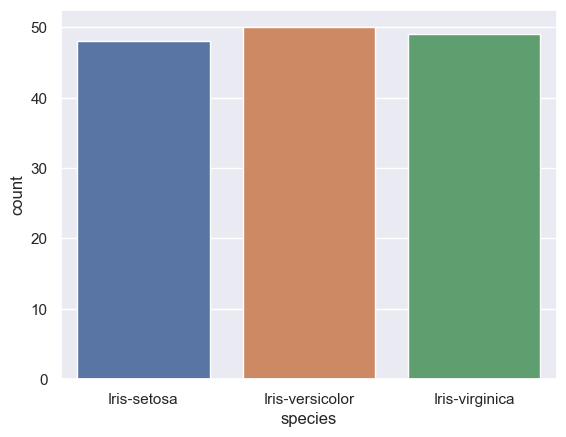

In [16]:
sns.set()
sns.countplot(x = 'species', data = dataset,  )

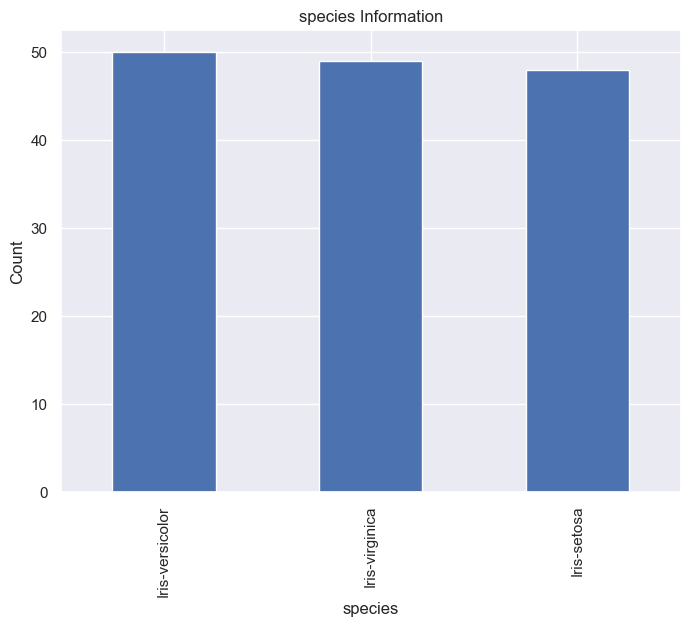

In [17]:
plt.figure(figsize=(8, 6))
dataset['species'].value_counts().plot(kind='bar')
plt.title('species Information')
plt.xlabel('species')
plt.ylabel('Count')
plt.show()

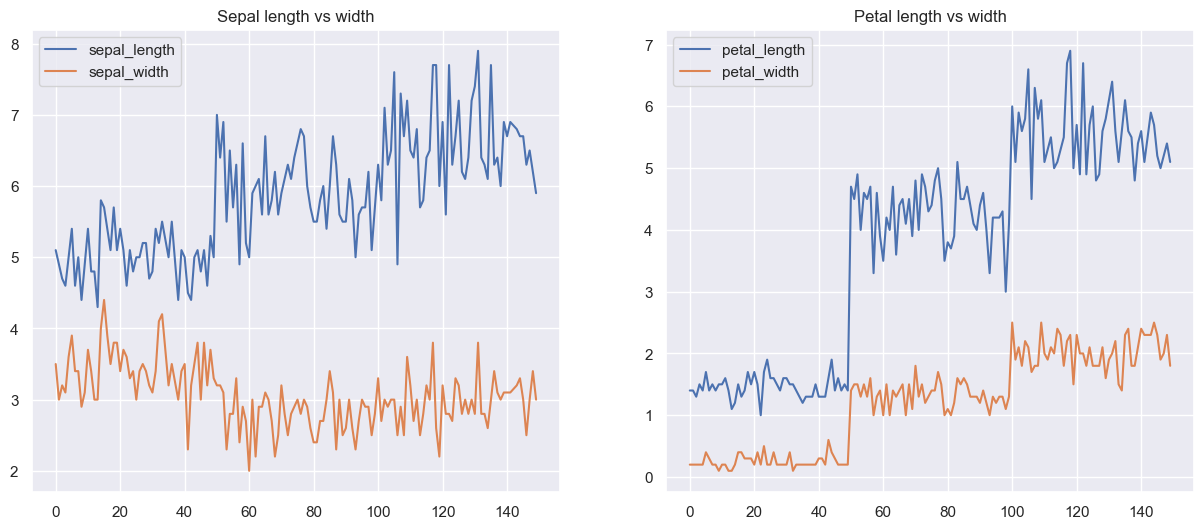

In [19]:
#showing in a graph width is less than length for sepal and petal
fig,ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(dataset['sepal_length'])
ax[0].plot(dataset['sepal_width'])
ax[0].set_title('Sepal length vs width')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(dataset['petal_length'])
ax[1].plot(dataset['petal_width'])
ax[1].set_title('Petal length vs width')
ax[1].legend(['petal_length','petal_width'])
plt.show()

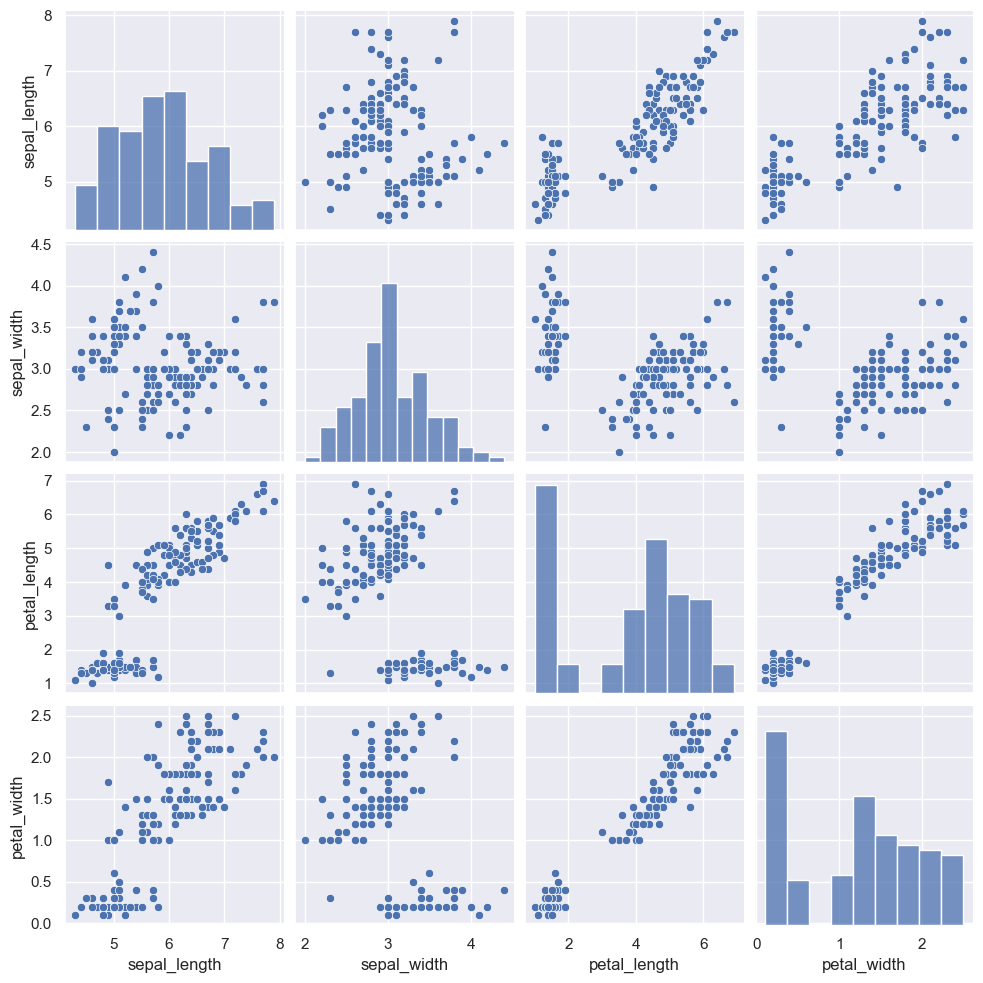

In [21]:
#perform bivariate analysis
sns.pairplot(dataset)
plt.show()

# Splitting dataset into train and test

In [26]:
dataset['species'] = LabelEncoder().fit_transform(dataset['species'])
X = dataset.drop(['species'],axis=1)
y = dataset['species']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lg = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()

# Checking the accuracy

In [27]:
models = [lg,dt,knn]
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy score of {model} is {accuracy_score(y_test,y_pred)}')

Accuracy score of LogisticRegression() is 0.9333333333333333
Accuracy score of DecisionTreeClassifier() is 0.9666666666666667
Accuracy score of KNeighborsClassifier() is 0.9333333333333333


C:\Users\Orange Computers\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
